# EMU Plotting and Analysis Tool:Tracer Tool

## Load Modules

In [59]:
## Load modules
import runpy
# The following are needed to load the plotting tool as a module
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import cmocean 
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os
import matplotlib.pyplot as plt
import lib_python
import plot_adj
import os
import matplotlib.pyplot as plt
import imageio


### Plot Tracer

***To get help information, including the available arguments, uncomment `help(ept.emu_plot)`.***

In [60]:
# help(ept.emu_plot)

In [61]:
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.

# Tracer Tool
globals_dict = ept.emu_plot(run_name="/efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_577_212_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_577_212_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0

Reading /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_577_212_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0

Reading Tracer Tool output ... 

Detected     13 files of ptracer_mon_mean.*.data
Detected     12 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_577_212_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/output/ptracer_mon_mean.0000005076.data

Reading file ... /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_577_212_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/output/ptracer_mon_mean.0000005111.data

Reading file ... /efs_ecco/murrica

***Extract return variables***

In [62]:
# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')
hfacc = globals_dict.get('emu').hfacc 
drf = globals_dict.get('emu').drf 
#  More variables used by ept
# emu = globals_dict.get('return_vars')

In [63]:
# Check the keys in the dictionary
return_vars_dict.keys()

dict_keys(['trc', 'trc_unit', 'files', 'timesteps', 'gm_tracer_content', 'gm_tracer_content_unit'])

***Plots***

In [64]:
# Extract Return Variables 

trc_all = return_vars_dict['trc'] # 3d tracer content
trc_all_vsum_1994 = np.sum(hfacc * np.expand_dims(drf, axis=(1,2)) * trc_all, axis=1)
files = return_vars_dict['files']

In [65]:
print("trc_all shape:", trc_all.shape)
print("drf shape:", drf.shape)
print("hfacc shape:", hfacc.shape)


trc_all shape: (13, 50, 1170, 90)
drf shape: (50,)
hfacc shape: (50, 1170, 90)


In [66]:
# set plotting parameters
dscale = 0.1
colors = ['darkblue', 'mediumseagreen', 'gold', 'darkred']
# Crear el colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
custom_cmap.set_bad(color='gray')  # Set the color for masked elements to gray
cmap = custom_cmap

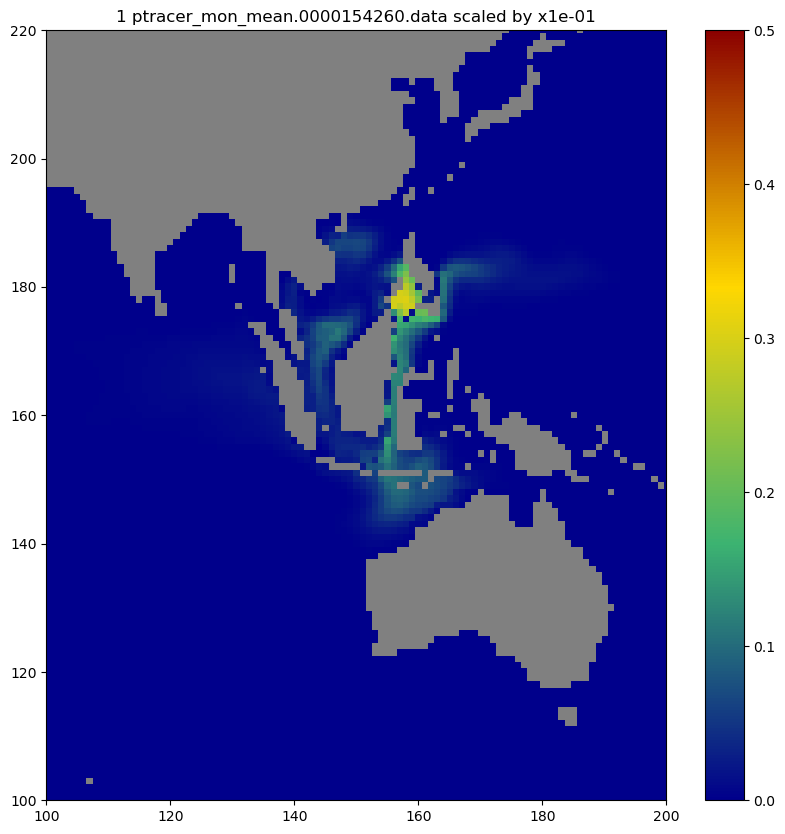

In [96]:
# Tracer 12 months before
plt.figure(figsize=(10,10))
imon = 1

fname=os.path.basename(files[imon-1])
ftitle = f'{imon} {fname} scaled by x{dscale:.0e}'
# Apply the scaling factor and mask out the land points
masked_dumg = dscale*lib_python.nat2globe(trc_all_vsum_1994[imon-1,:])
dummskg = lib_python.nat2globe(hfacc[0])
masked_dumg[dummskg==0]=np.nan

plt.title(ftitle)        
plt.imshow(masked_dumg, origin='lower',cmap=cmap, aspect='auto', vmin=0, vmax=0.5) 
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.colorbar()
plt.show()

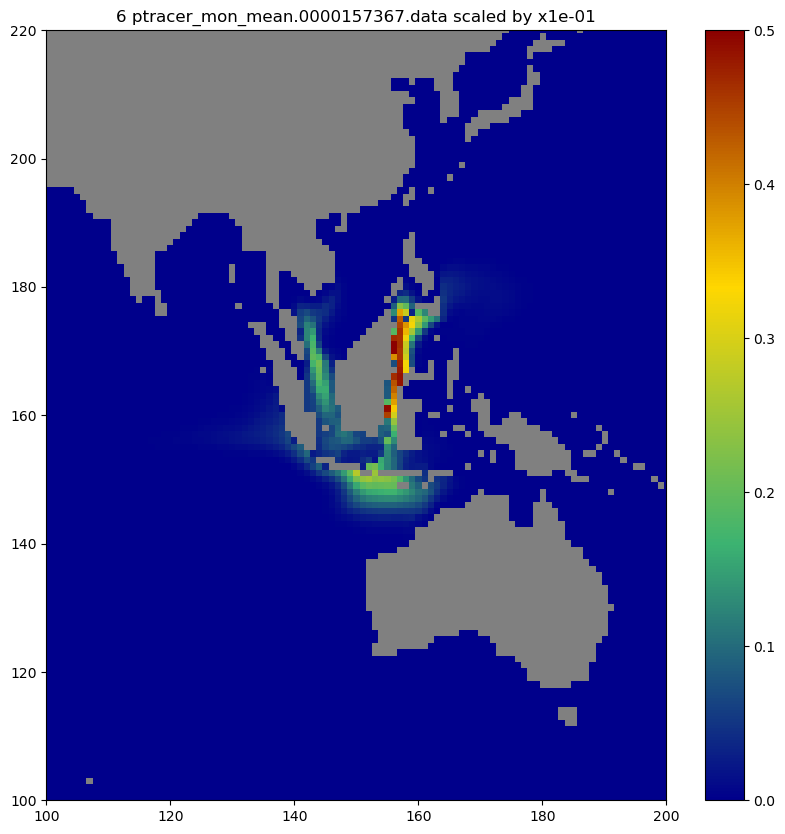

In [97]:
# Tracer at month 6
plt.figure(figsize=(10,10))
imon = 6
fname=os.path.basename(files[imon-1])
ftitle = f'{imon} {fname} scaled by x{dscale:.0e}'

# Apply the scaling factor and mask out the land points
masked_dumg = dscale*lib_python.nat2globe(trc_all_vsum_1994[imon-1,:])
dummskg = lib_python.nat2globe(hfacc[0])
masked_dumg[dummskg==0]=np.nan

plt.title(ftitle)        
plt.imshow(masked_dumg, origin='lower',cmap=cmap, aspect='auto', vmin=0, vmax=0.5)
plt.colorbar()  
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.show()

In [98]:
### GIF 1994 ###

dscale = 0.1
cmap = cmap
cmap.set_bad(color='gray')

# Create folder frames
output_dir = "tracer_gif_frames"
os.makedirs(output_dir, exist_ok=True)

file_paths = []
num_months = len(files)

# Each plot: 1 month
for imon in range(1, num_months + 1):
    fname = os.path.basename(files[imon-1])
    ftitle = f'{imon} {fname} scaled by x{dscale:.0e}'

    masked_dumg = dscale * lib_python.nat2globe(trc_all_vsum_1994[imon-1, :])
    dummskg = lib_python.nat2globe(hfacc[0])
    masked_dumg[dummskg == 0] = np.nan

    plt.figure(figsize=(10, 6))
    plt.title(ftitle)
    plt.imshow(masked_dumg, origin='lower', cmap=cmap, aspect='auto', vmin=0, vmax=0.5)
    plt.colorbar(label='Tracer concentration')

    frame_path = os.path.join(output_dir, f"frame_{imon:02d}.png")
    plt.savefig(frame_path)
    plt.close()
    file_paths.append(frame_path)

# Create GIF 
gif_path = "tracer_monthly_evolution_1994.gif"
with imageio.get_writer(gif_path, mode='I', duration=10) as writer:
    for frame_file in file_paths:
        image = imageio.v2.imread(frame_file)
        writer.append_data(image)

print(f"GIF saved as: {gif_path}")


GIF saved as: tracer_monthly_evolution_1994.gif


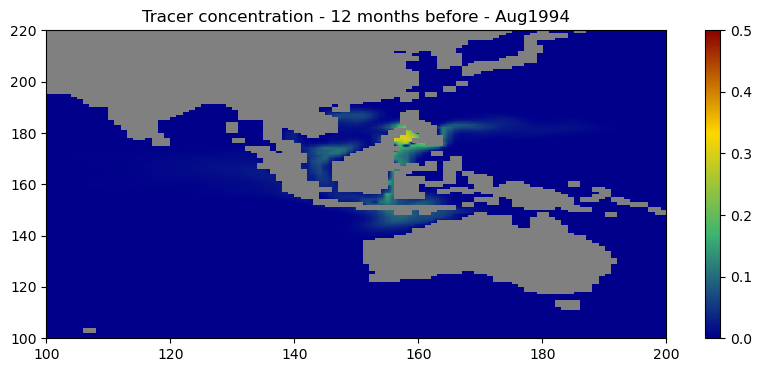

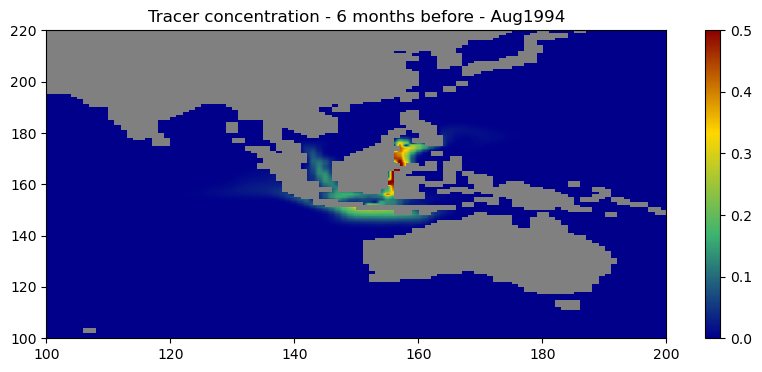

In [99]:
#### Tracer concentration 1994 specific months ###

imon_event = -1  # 
imon_12_before = imon_event - 12
imon_6_before = imon_event - 6

# 12 months before
plt.figure(figsize=(10, 4))
plt.title("Tracer concentration - 12 months before - Aug1994")
masked_12_1994 = dscale * lib_python.nat2globe(trc_all_vsum_1994[imon_12_before, :])
masked_12_1994[lib_python.nat2globe(hfacc[0]) == 0] = np.nan
plt.imshow(masked_12_1994, origin='lower', cmap=cmap, aspect='auto', vmin=0, vmax=0.5)
plt.colorbar()
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.show()

# 6 months before
plt.figure(figsize=(10, 4))
plt.title("Tracer concentration - 6 months before - Aug1994")
masked_6_1994 = dscale * lib_python.nat2globe(trc_all_vsum_1994[imon_6_before, :])
masked_6_1994[lib_python.nat2globe(hfacc[0]) == 0] = np.nan
plt.imshow(masked_6_1994, origin='lower', cmap=cmap, aspect='auto',vmin=0, vmax=0.5)
plt.colorbar()
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.show()


In [100]:
# Tracer 2010

globals_dict = ept.emu_plot(run_name="/efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_6793_6428_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0",
                            avg_type='m',
                            pfile_beg=0, pfile_end=1000000)

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_6793_6428_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0

Reading /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_6793_6428_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0

Reading Tracer Tool output ... 

Detected     13 files of ptracer_mon_mean.*.data
Detected     12 files of ptracer_mon_snap.*.data

Averaging type ("m" for monthly or "s" for snapshot): m

==> Reading and plotting monthly means ... 
Specified start and end files #: 0 and 1000000


Reading file ... /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_6793_6428_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/output/ptracer_mon_mean.0000154260.data

Reading file ... /efs_ecco/murricar/ecco-2025_runs/tracer/emu_trc_6793_6428_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0/output/ptracer_mon_mean.0000154439.data

Reading file ... /efs_ecco

In [101]:
# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')
hfacc = globals_dict.get('emu').hfacc 
drf = globals_dict.get('emu').drf 

In [102]:
trc_all = return_vars_dict['trc'] # 3d tracer content
trc_all_vsum_2010 = np.sum(hfacc * np.expand_dims(drf, axis=(1,2)) * trc_all, axis=1)
files = return_vars_dict['files']

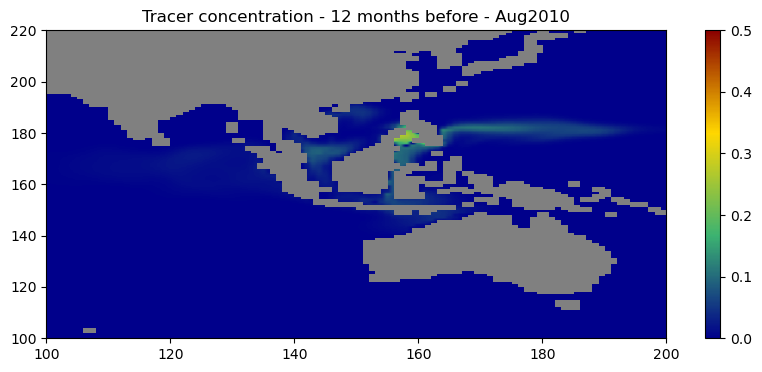

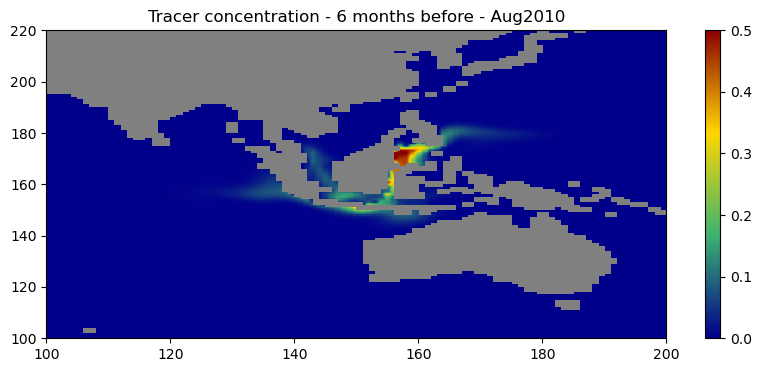

In [103]:
#### Tracer concentration 2010 specific months ###

imon_event = -1  # 
imon_12_before = imon_event - 12
imon_6_before = imon_event - 6

# 12 months before
plt.figure(figsize=(10, 4))
plt.title("Tracer concentration - 12 months before - Aug2010")
masked_12_2010 = dscale * lib_python.nat2globe(trc_all_vsum_2010[imon_12_before, :])
masked_12_2010[lib_python.nat2globe(hfacc[0]) == 0] = np.nan
plt.imshow(masked_12_2010, origin='lower', cmap=cmap, aspect='auto', vmin=0, vmax=0.5)
plt.colorbar()
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.show()

# 6 months before
plt.figure(figsize=(10, 4))
plt.title("Tracer concentration - 6 months before - Aug2010")
masked_6_2010 = dscale * lib_python.nat2globe(trc_all_vsum_2010[imon_6_before, :])
masked_6_2010[lib_python.nat2globe(hfacc[0]) == 0] = np.nan
plt.imshow(masked_6_2010, origin='lower', cmap=cmap, aspect='auto',vmin=0, vmax=0.5)
plt.colorbar()
plt.ylim([100, 220])
plt.xlim([100, 200])
plt.show()


In [104]:
### GIF 2010 ###

dscale = 0.1
cmap = cmap
cmap.set_bad(color='gray')

# Create folder frames
output_dir = "tracer_gif_frames"
os.makedirs(output_dir, exist_ok=True)

file_paths = []
num_months = len(files)

# Each plot: 1 month
for imon in range(1, num_months + 1):
    fname = os.path.basename(files[imon-1])
    ftitle = f'{imon} {fname} scaled by x{dscale:.0e}'

    masked_dumg = dscale * lib_python.nat2globe(trc_all_vsum_2010[imon-1, :])
    dummskg = lib_python.nat2globe(hfacc[0])
    masked_dumg[dummskg == 0] = np.nan

    plt.figure(figsize=(10, 6))
    plt.title(ftitle)
    plt.imshow(masked_dumg, origin='lower', cmap=cmap, aspect='auto', vmin=0, vmax=0.5)
    plt.colorbar(label='Tracer concentration')
    plt.ylim([100, 220])
    plt.xlim([100, 200])

    frame_path = os.path.join(output_dir, f"frame_{imon:02d}.png")
    plt.savefig(frame_path)
    plt.close()
    file_paths.append(frame_path)

# Create GIF 
gif_path = "tracer_monthly_evolution_2010.gif"
with imageio.get_writer(gif_path, mode='I', duration=10) as writer:
    for frame_file in file_paths:
        image = imageio.v2.imread(frame_file)
        writer.append_data(image)

print(f"GIF saved as: {gif_path}")


GIF saved as: tracer_monthly_evolution_2010.gif


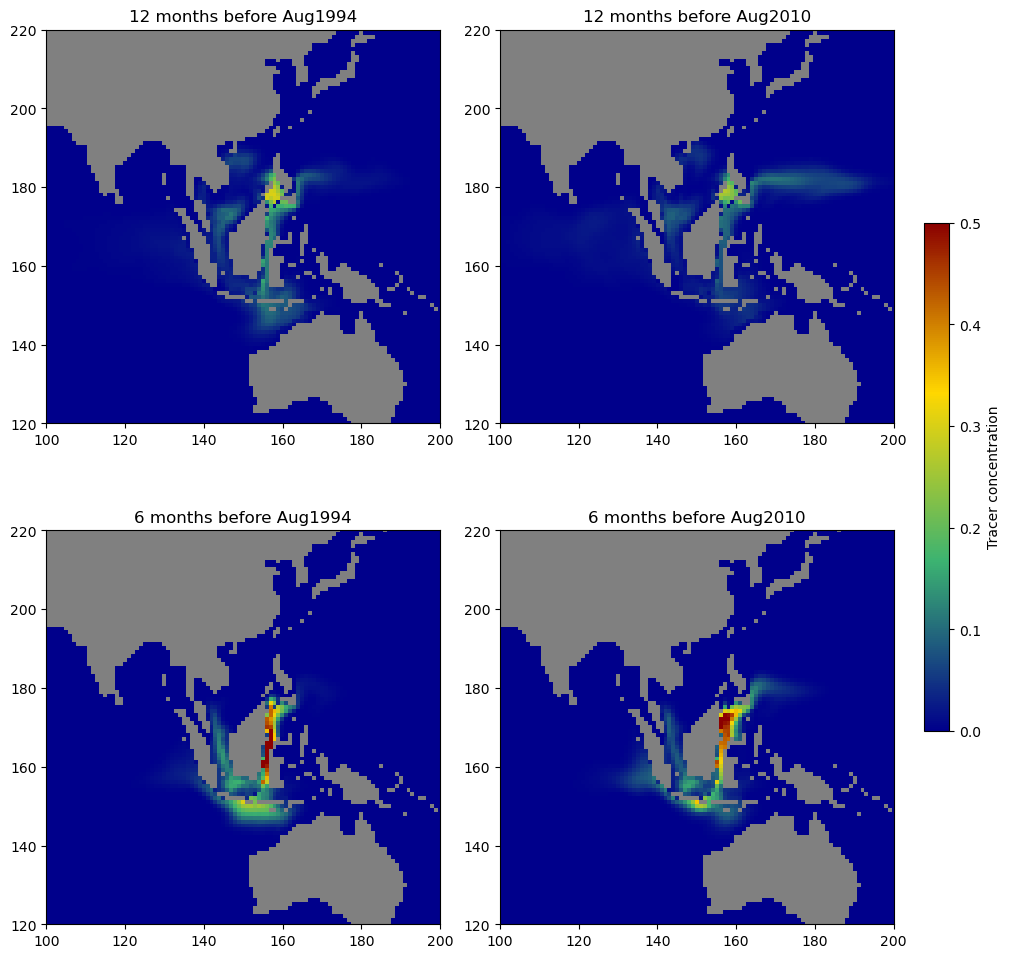

In [113]:
import matplotlib.pyplot as plt

# Crear figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

# Lista de datos y títulos
data_list = [
    (masked_12_1994, "12 months before Aug1994"),
    (masked_12_2010, "12 months before Aug2010"),
    (masked_6_1994, "6 months before Aug1994"),
    (masked_6_2010, "6 months before Aug2010"),
    
]

# Graficar cada mapa
vmin = 0
vmax = 0.5
cmap = cmap  # ya definido, por ejemplo con cmocean

ims = []
for ax, (data, title) in zip(axs.flat, data_list):
    im = ax.imshow(data, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(f"{title}")
    ims.append(im)
    ax.set_ylim([120, 220])
    ax.set_xlim([100, 200])

# Añadir una barra de colores común
cbar = fig.colorbar(ims[0], ax=axs, orientation='vertical', fraction=0.03, pad=0.02)
cbar.set_label("Tracer concentration")
plt.savefig('adjoint_tracer_1994vs2010.png')
plt.show()
